In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df=pd.read_csv("Amazon Sales Records.csv")

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
df.shape

(100, 14)

In [4]:
# null data
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [5]:
# duplicate data
df.duplicated().sum()

0

## Categorical Features

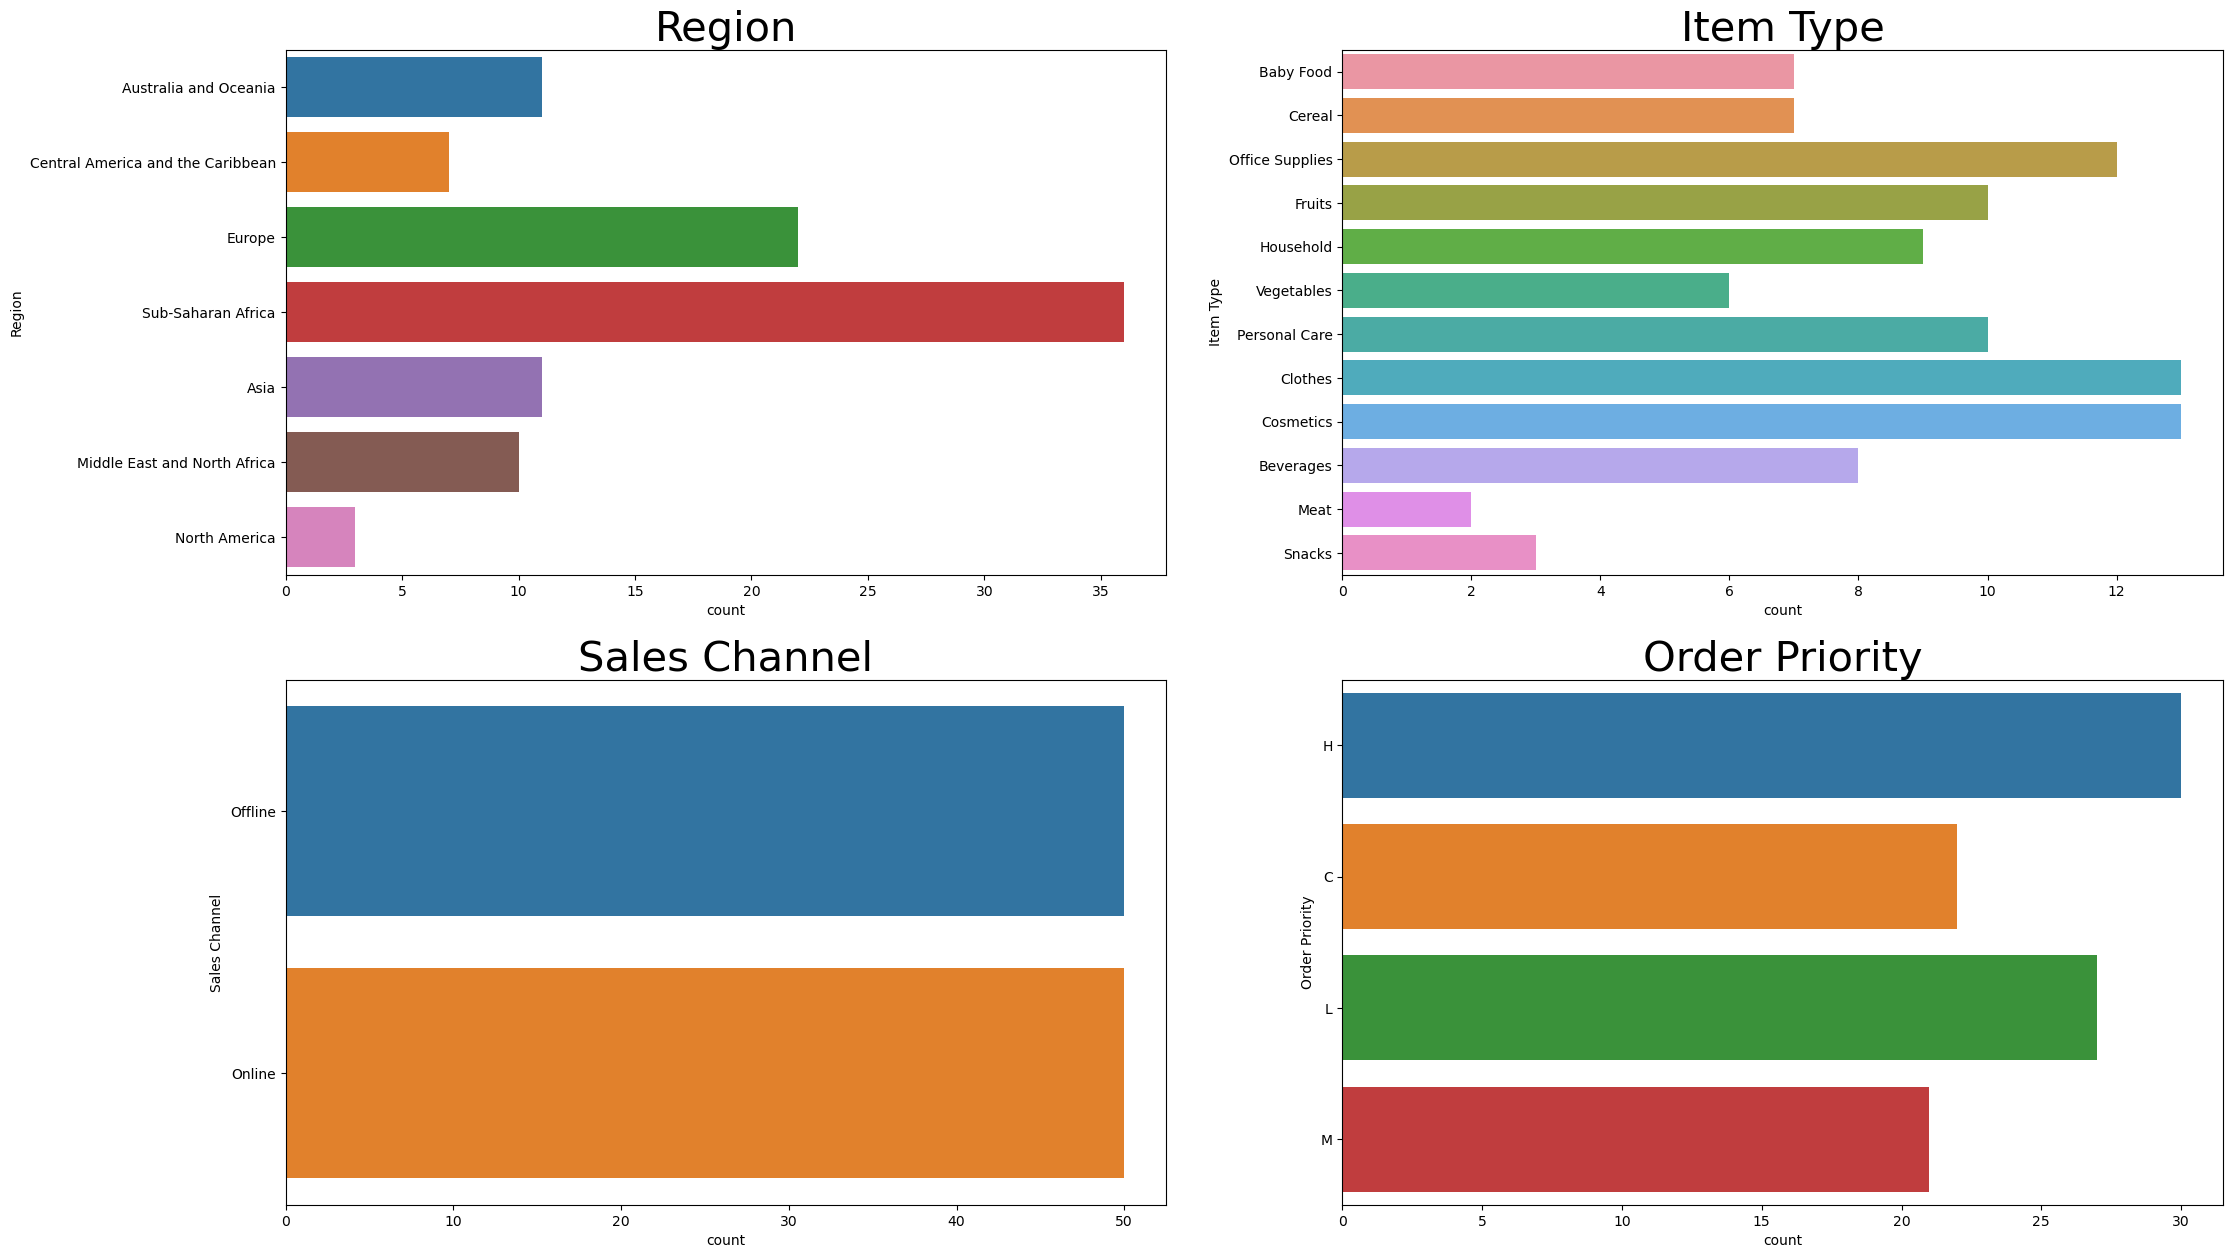

In [6]:
features=['Region','Item Type', 'Sales Channel', 'Order Priority']
i=1
plt.figure(figsize=(25,15))
for feature in features:
    plt.subplot(2,2,i)
    plt.title(feature,fontsize=30)
    sns.countplot(y=df[feature])
    i+=1

## Numerical Feature

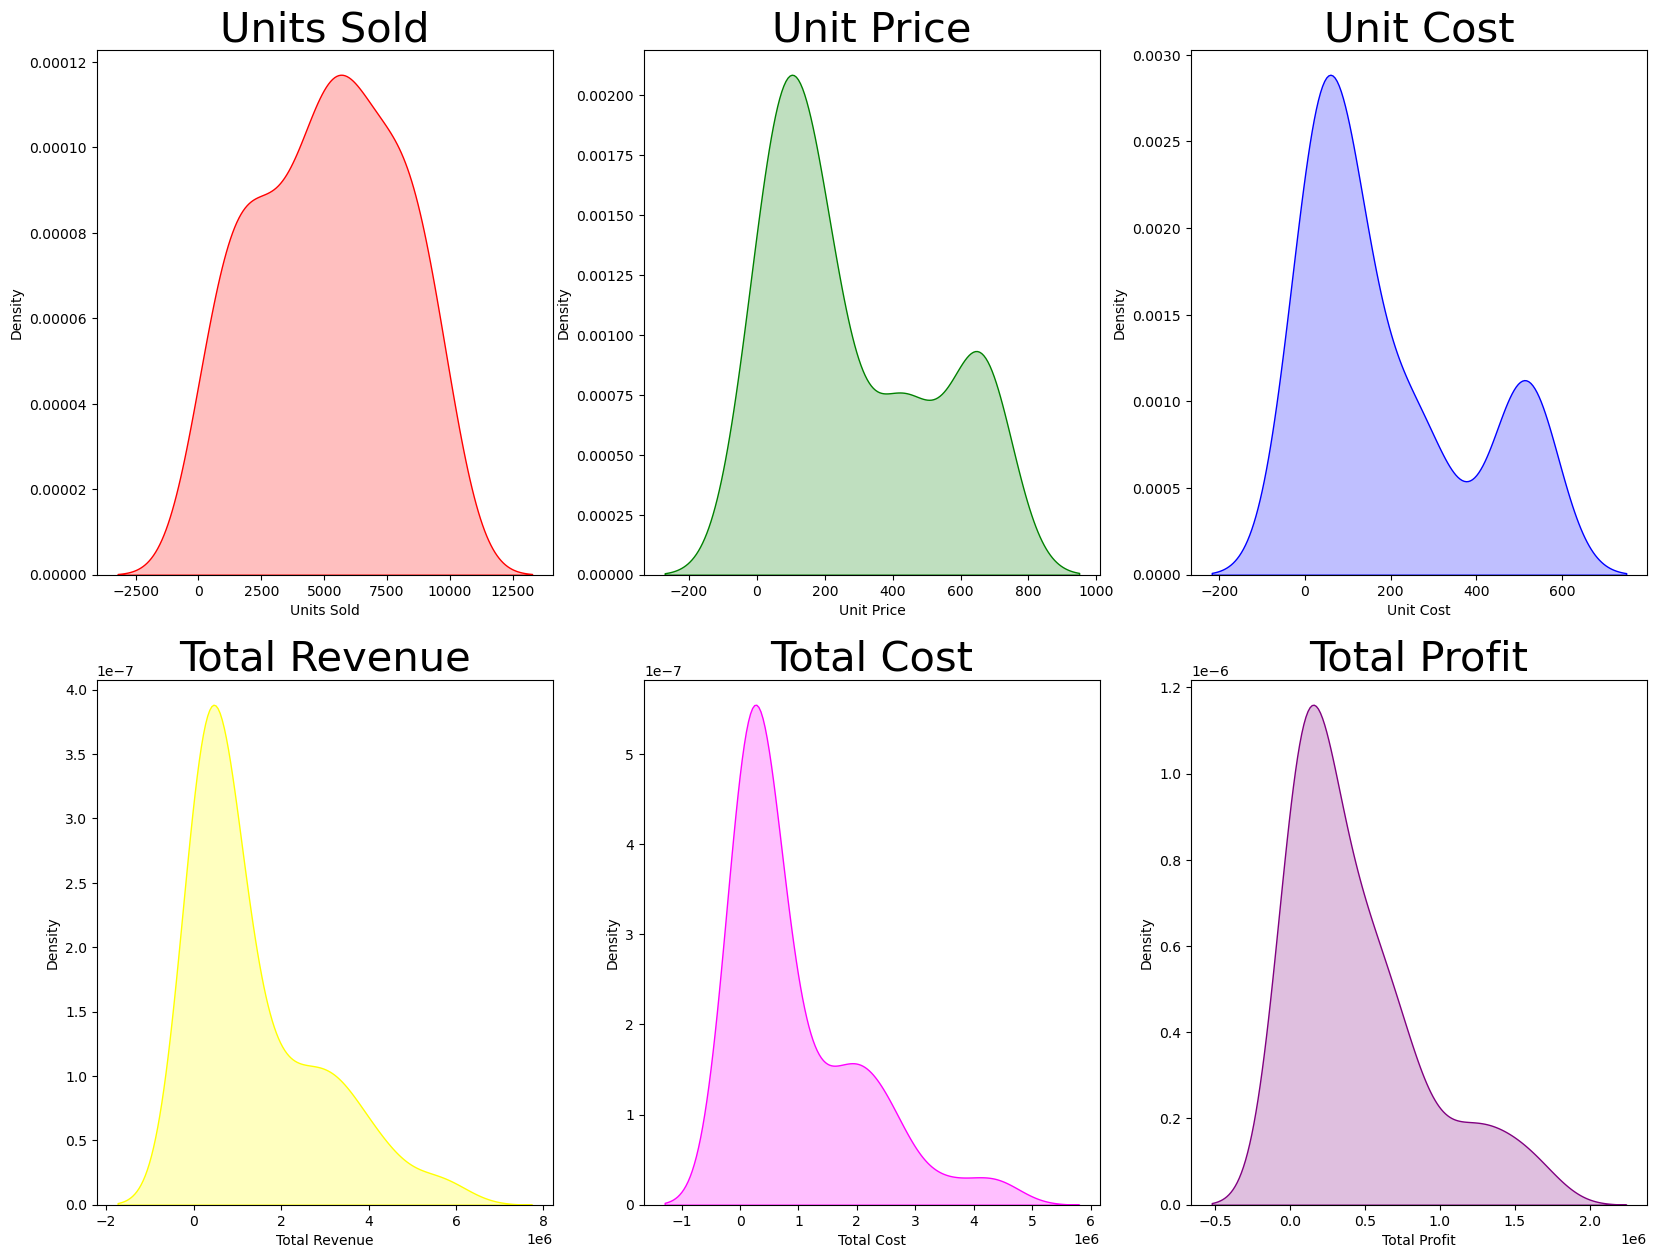

In [7]:
features=['Units Sold', 'Unit Price','Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

plt.figure(figsize=(20,15))
i=1
color=['red','green','blue','yellow','magenta','purple']
for feature in features:
    plt.subplot(2,3,i)
    plt.title(feature,fontsize=30)
    sns.kdeplot(df[feature],shade='fill',color=color[i-1])
    i+=1

## Cleaning Data

In [8]:
order_date=pd.to_datetime(df['Order Date'])

In [9]:
# Creating new columns
df['Order Year']=order_date.dt.year
df['Order Month Name']=order_date.dt.month_name()
df['Order Month']=order_date.dt.month

In [11]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month Name,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,8
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,May,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,February,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,07-26-2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72,2011,July,7
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,November,11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,June,6
98,North America,Mexico,Personal Care,Offline,M,07-30-2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,July,7


In [12]:
# Dropping Useless Columns
df.drop(['Order Date', 'Order ID', 'Ship Date'],axis=1,inplace=True)

In [13]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month Name,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,8
2,Europe,Russia,Office Supplies,Offline,L,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,May,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,February,2


In [14]:
# saving cleaned file
df.to_csv('Amazon_Cleaned_Data_Set.csv',index=False)

# Analysis

In [2]:
df=pd.read_csv('Amazon_Cleaned_Data_Set.csv')

In [17]:
l=['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America']
for i in l:
    temp=df[df['Region']==i]
    print(f"{i} (Revenue[{temp['Total Revenue'].sum()/10**6}] & Orders[{len(temp)}])",(temp['Total Revenue'].sum()/len(temp))/10**6)

Australia and Oceania (Revenue[14.094265130000002] & Orders[11]) 1.2812968300000003
Central America and the Caribbean (Revenue[9.170385490000001] & Orders[7]) 1.31005507
Europe (Revenue[33.36893211] & Orders[22]) 1.5167696413636365
Sub-Saharan Africa (Revenue[39.672031430000004] & Orders[36]) 1.102000873055556
Asia (Revenue[21.347091020000004] & Orders[11]) 1.9406446381818183
Middle East and North Africa (Revenue[14.05270658] & Orders[10]) 1.405270658
North America (Revenue[5.643356550000001] & Orders[3]) 1.8811188500000002


In [7]:
df['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            100 non-null    object 
 1   Country           100 non-null    object 
 2   Item Type         100 non-null    object 
 3   Sales Channel     100 non-null    object 
 4   Order Priority    100 non-null    object 
 5   Units Sold        100 non-null    int64  
 6   Unit Price        100 non-null    float64
 7   Unit Cost         100 non-null    float64
 8   Total Revenue     100 non-null    float64
 9   Total Cost        100 non-null    float64
 10  Total Profit      100 non-null    float64
 11  Order Year        100 non-null    int64  
 12  Order Month Name  100 non-null    object 
 13  Order Month       100 non-null    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 11.1+ KB


TypeError: 'NoneType' object is not subscriptable

In [218]:
# return values in millions
def yearly_stats(df,year,region):
    total_revenue,total_cost,total_profit,profit_margin=None,None,None,None
    
    if year!='All' and region!="All":
        new_df=df[(df['Region']==region) & (df['Order Year']==year)]
        total_revenue=round(new_df['Total Revenue'].sum()/10**6,2)
        total_cost=round(new_df['Total Cost'].sum()/10**6,2)  
        total_profit=round(new_df['Total Profit'].sum()/10**6,2)    
        profit_margin=round(total_profit/total_revenue*100,2)
        
    elif year=='All' and region!="All":
        new_df=df[df['Region']==region]
        total_revenue=round(new_df['Total Revenue'].sum()/10**6,2)
        total_cost=round(new_df['Total Cost'].sum()/10**6,2)  
        total_profit=round(new_df['Total Profit'].sum()/10**6,2)    
        profit_margin=round(total_profit/total_revenue*100,2)
    
    elif year!='All' and region=="All":
        new_df=df[df['Order Year']==year]
        total_revenue=round(new_df['Total Revenue'].sum()/10**6,2)
        total_cost=round(new_df['Total Cost'].sum()/10**6,2)  
        total_profit=round(new_df['Total Profit'].sum()/10**6,2)    
        profit_margin=round(total_profit/total_revenue*100,2)
    
    else:
        total_revenue=round(df['Total Revenue'].sum()/10**6,2)
        total_cost=round(df['Total Cost'].sum()/10**6,2)  
        total_profit=round(df['Total Profit'].sum()/10**6,2)    
        profit_margin=round(total_profit/total_revenue*100,2)
    
    return total_revenue,total_cost,total_profit,profit_margin

In [312]:
def yearly_region_sales(df,year):
    d=dict()
    if year=="All":
        temp_df=df.groupby('Region').sum().reset_index()
    else:
        temp_df=df[df['Order Year']==year].groupby('Region').sum().reset_index()
    temp_df['Total Revenue']=round(temp_df['Total Revenue']/10**6,2)
    temp_df['Total Profit']=round(temp_df['Total Profit']/10**6,2)
    d['Region']=list(temp_df['Region'])
    d['Units Sold']=list(temp_df['Units Sold'])
    d['Total Revenue']=list(temp_df['Total Revenue'])
    d['Total Profit']=list(temp_df['Total Profit'])
    return d

In [30]:
# retrun offline and oline channels value
def Yearly_Sales_Channels(df,year):
    if year=='All':
        temp=df['Sales Channel'].value_counts()
        return temp[0], temp[1]
    if year!='All':
        temp=df[df['Order Year']==year]['Sales Channel'].value_counts()
        return temp[0],temp[1]

In [57]:
def Yearly_item_type_analysis(df,year):
    if year=='All':
        data=df['Item Type'].value_counts().reset_index()
    if year!='All':
        data=df[df['Order Year']==year]['Item Type'].value_counts().reset_index()
    
    return data

In [87]:
df[df['Region']=='Asia'][]['Item Type'].value_counts()

Clothes            2
Vegetables         2
Household          2
Office Supplies    2
Fruits             1
Personal Care      1
Cosmetics          1
Name: Item Type, dtype: int64

In [90]:
df[df['Item Type']=='Cosmetics']['Total Revenue'].sum()

36601509.6

In [95]:
df['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [98]:
items=['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household','Vegetables', 
       'Personal Care', 'Clothes', 'Cosmetics', 'Beverages','Meat', 'Snacks']
regions=['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America']

In [99]:
for r in regions:
    for i in items

SyntaxError: unexpected EOF while parsing (3905391386.py, line 2)

In [103]:
r_filter=(df['Region']=='Asia')
df[r_filter].groupby(by='Item Type').sum().reset_index().sort_values(by='Total Profit',ascending=False)

,Item Type,Unnamed: 0,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
3,Household,51,12080,1336.54,1005.08,8072701.60,6070683.20,2002018.40,4025,13
4,Office Supplies,108,11718,1302.42,1049.92,7630878.78,6151481.28,1479397.50,4025,8
1,Cosmetics,16,6952,437.20,263.33,3039414.40,1830670.16,1208744.24,2016,11
0,Clothes,56,14193,218.56,71.68,1551011.04,508677.12,1042333.92,4032,12
6,Vegetables,87,3856,308.12,181.86,594055.36,350626.08,243429.28,4022,15
5,Personal Care,14,4901,81.73,56.67,400558.73,277739.67,122819.06,2014,2
2,Fruits,96,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11


In [108]:
temp=df.groupby('Region')

In [113]:
df.groupby('Order Month Name').sum().reset_index()

,Order Month Name,Unnamed: 0,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
0,April,371,44680,2888.93,2043.29,16187186.33,11426977.98,4760208.35,18118,36
1,August,134,17251,333.64,166.79,1128164.91,548888.24,579276.67,8054,32
2,December,232,16043,1920.14,1404.17,7249462.12,4893232.05,2356230.07,10065,60
3,February,622,71079,4496.69,3178.91,24740517.77,17668467.26,7072050.51,26172,26
4,January,358,35742,2718.95,2059.80,10482467.12,7665610.10,2816857.02,14095,7
5,July,653,76201,2264.28,1446.97,15669518.50,10091055.44,5578463.06,24162,84
6,June,498,34893,2006.48,1276.50,5230325.77,3044946.34,2185379.43,20129,60
7,March,221,14497,647.19,381.82,2274823.87,1346472.81,928351.06,8058,12
8,May,385,63651,2948.46,2038.25,13215739.99,8633047.69,4582692.30,22150,55
9,November,557,53261,3410.23,2392.13,20568222.76,14110622.11,6457600.65,18115,99


## Power BI

Creating a multipage Power BI project for Amazon sales analysis with the given features can provide valuable insights for decision-making. Here's an outline of how you can structure your project:

**Page 1: Overview Dashboard**
- Create a visually appealing dashboard that provides a high-level overview of Amazon sales data.
- Include key metrics such as Total Revenue, Total Cost, Total Profit, and Units Sold.
- Use KPI cards, gauges, and charts to showcase the overall performance.
- Add slicers for filtering data by Region, Country, Item Type, Sales Channel, and Order Priority.

**Page 2: Sales by Region and Country**
- Design a page that focuses on sales distribution across different regions and countries.
- Use a map visualization to display sales by region, shading the map based on Total Revenue.
- Create a bar chart or column chart to show the top-performing countries in terms of Total Revenue.
- Include a table that lists detailed sales information for each country.

**Page 3: Product Analysis**
- Dedicate a page to analyzing sales based on different Item Types.
- Use a stacked column chart to show Total Revenue and Total Profit by Item Type.
- Add a slicer for selecting specific Item Types for analysis.
- Include a table or matrix that displays detailed sales data for each Item Type.

**Page 4: Sales Channels and Order Priority**
- Create visualizations that explore sales distribution across different Sales Channels and Order Priorities.
- Use a pie chart or stacked bar chart to represent sales distribution by Sales Channel.
- Display a bar chart or donut chart showcasing sales distribution by Order Priority.
- Consider adding a slicer to switch between Sales Channels and Order Priorities.

**Page 5: Sales Trends Over Time**
- Design a line chart that depicts Total Revenue, Total Cost, and Total Profit trends over the Order Years and Months.
- Use a combo chart to show Units Sold and Unit Price trends over the same period.
- Add a slicer to filter data by Year and Month.

**Page 6: Monthly Performance Analysis**
- Create a page that offers a detailed analysis of monthly sales performance.
- Use a matrix to display Total Revenue, Total Cost, and Total Profit by Order Year and Month.
- Include line charts or sparklines to visualize the monthly trend of Units Sold and Unit Price.
- Add a card or visual that calculates the average values for key metrics.

**Page 7: Top Performers and Bottom Performers**
- Design a page that highlights the top and bottom performers based on Total Profit.
- Use a horizontal bar chart to showcase the top and bottom countries or regions by Total Profit.
- Include a table that lists the top-selling and bottom-selling products by Total Revenue or Total Profit.

**Page 8: Drill-Through Pages**
- Create drill-through pages that allow users to dive deeper into specific data points.
- For example, users could click on a country in the Sales by Region and Country page to see a detailed analysis of that country's sales performance.

Remember to maintain consistent design elements, color schemes, and fonts throughout the project for a professional and cohesive look. Additionally, ensure that the visuals are interactive and responsive to user selections, enabling users to explore the data effectively.

# Power BI

Here are some ideas for creating a multipage Power BI project of Amazon sales analysis having the given features:

* **Page 1: Sales overview**
  * This page should provide a high-level overview of the sales data, including total sales, total revenue, total profit, and average order value.
  * It could also include a breakdown of sales by region, country, item type, sales channel, and order priority.
* **Page 2: Sales trends**
  * This page should visualize the sales trends over time, such as year-over-year sales growth, monthly sales trends, and weekly sales trends.
  * It could also include a comparison of sales trends between different regions, countries, item types, sales channels, and order priorities.
* **Page 3: Top products**
  * This page should identify the top-selling products, both in terms of units sold and total revenue.
  * It could also include a breakdown of the top-selling products by region, country, item type, sales channel, and order priority.
* **Page 4: Profitability analysis**
  * This page should analyze the profitability of different products, sales channels, and regions.
  * It could also identify the products that are most profitable and the products that are least profitable.
* **Page 5: Customer insights**
  * This page should provide insights into customer behavior, such as which customers are most likely to buy, which products are most popular with different customer segments, and which sales channels are most effective.

These are just a few ideas for creating a multipage Power BI project of Amazon sales analysis. The specific features and visualizations that you include will depend on the specific goals of your project. However, by following these general guidelines, you can create a powerful and informative analysis that can help you make better business decisions.

Here are some additional tips for creating a successful Power BI project:

* Use clear and concise labels for your visualizations.
* Use colors and formatting to make your visualizations easy to read.
* Add filters and drill-downs to allow users to explore the data in more depth.
* Share your project with others to get feedback and suggestions.

By following these tips, you can create a Power BI project that is both informative and engaging.